In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from datetime import datetime
from kmodes.kprototypes import KPrototypes
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [525]:
data = pd.read_csv('C:/Users/PL186042/Documents/Driver_action_assets/Emotion-Recognition-using-Python-master/Final_code/Telematics-POC.csv')

In [526]:
##removing features which has 90% na values
na_list=[]
for i in data.columns:
    if(data[i].isna().sum()!=0):
        percent = (np.round((data[i].isna().sum())/len(data),4))*100
        if(percent >=90):
            print(i,': ',percent)
            na_list.append(i)

data = data.drop(na_list, axis=1)

INSURANCE :  99.99
OTHER :  100.0
MAINTENANCE :  96.09
AVOIDABLES :  99.63
FAM :  99.15
ADHOC_RENTAL :  100.0
TRAFFIC_FINE :  98.98
LICENSING :  99.96000000000001
SUNDRIES :  100.0
MONTHLY_KM_EXCEEDED :  100.0
PAST_CONTRACT_KM :  100.0
UNDER_UTILSED :  90.29


In [527]:
data.shape

(24536, 37)

In [528]:
#getting count of customer_trading_name for each company code 
data.groupby('COMPANY_CODE', as_index=False).agg({"CUSTOMER_TRADING_NAME": "count"})

,COMPANY_CODE,CUSTOMER_TRADING_NAME
0,KFS,662
1,LES,5059
2,NAM,121
3,RSA,18554
4,TAN,34
5,VUS,102
6,ZAM,4


In [529]:
#getting count of customer_trading_name for each company code 
data.groupby('COMPANY_CODE', as_index=False).agg({"CUSTOMER_TRADING_NAME": "count"})

,COMPANY_CODE,CUSTOMER_TRADING_NAME
0,KFS,662
1,LES,5059
2,NAM,121
3,RSA,18554
4,TAN,34
5,VUS,102
6,ZAM,4


In [530]:
##checking how the features related to each other 
trading_name_for_company_code = data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME'])['CUSTOMER_TRADING_NAME'].count()
pd.DataFrame(trading_name_for_company_code)

CUSTOMER_TRADING_NAME
COMPANY_CODE CUSTOMER_TRADING_NAME                ACCOUNT_NAME                                    COST_CENTRE_NAME                                      
KFS          AVIS FLEET SERVICES - KWANE          ZEDA USED CARS                                  USED CARS                                           17
             KWANE FLEET SERVICES (PTY) LTD       ALFRED NZO LOCAL MUNICIPALITY                   ALFRED NZO                                         141
                                                  AMAHLATHI MUNICIPALITY                          AMAHLATHI MUNICIPALITY                              26
                                                  KWANE FLEET SERVICES (PTY) LTD                  KWANE CAPITAL                                       65
                                                  MBHASHE                                         MBHASHE                                             89
                                                  NKONKOBE MUNICIPALITY                           NKONKOBE MUNICIPALITY                               28
                                                  PORT ST JOHNS MUNICIPALITY                      PORT ST JOHNS MUNICIPALITY                          37
                                                  TSANTSABANE LOCAL MUNICIPALITY                  TSANTSABANE                                        259
LES          AVIS FLEET LESOTHO                   AVIS FLEET SERVICES LESOTHO                     LOAN VEHICLE                                        41
                                                                                                  WORKSHOP                                             8
                                                  LOAN VEHICLES                                   LOAN VEHICLE                                        46
             DAILY NEEDS ENTERPRISE PTY LTD       DAILY NEEDS ENTERPRISES PTY LTD                 DAILY NEEDS                                         66
             G4S SECURITY SERVICES (PTY) LTD      G4S CASH SOLUTIONS                              G4S LES CASH                                       205
                                                  G4S SECURE SOLUTIONS                            G4S LESOTHO                                        187
             GLASS WORLD (PTY) LTD                GLASS WORLD (PTY) LTD                           GLASS WORLD                                        200
             GOVERNMENT OF THE KINGDOM OF LESOTHO DEFENCE AND NATIONAL SECURITY - ADMIN           DEFENCE                                              2
                                                  DEFENCE AND NATIONAL SECURITY - NSS             BEREA                                                3
                                                                                                  MAFETENG                                             6
                                                                                                  MASERU                                               2
                                                                                                  N.S.S                                                6
                                                                                                  QACHAS NEK                                           4
                                                  EDUCATION AND TRAINING                          ADMIN                                               14
                                                                                                  T.S.C                                                2
                                                  FORESTRY AND LAND RECLAMATION                   ADMIN                                               14
                                                  LESOTHO MOUNTED POLICE SERVICES                 LESOTHO MOUNTED POLICE SERVICES                      1


In [531]:
#getting type and total unique count for feature 
veh_col = ['MAKE_DESCRIPTION', 'RANGE_DESCRIPTION','MODEL_DESCRIPTION', 'ENGINE_CAPACITY', 'FUEL_TYPE', 'FUEL_CONSUMPTION','NUMBER_OF_GEARS', 'VEHICLE_TYPE_DESCRIPTION']
uniq_len = []
type_len = []
for i in veh_col:
    uniq_len.append(len(data[i].unique()))
    type_len.append(data[i].unique())

data_veh = pd.DataFrame({'vehicle_col':veh_col, 'tot_uniq' :uniq_len, 'uniq_val':type_len})
data_veh

,tot_uniq,uniq_val,vehicle_col
0,37,"[TOYOTA, ISUZU, MAN, NISSAN, MERCEDES BENZ, IS...",MAKE_DESCRIPTION
1,167,"[COROLLA, KB, TGM, CLA, TGS, NP200, QUANTUM, H...",RANGE_DESCRIPTION
2,504,"[1.6 PRESTIGE CVT, 300 D-TEQ LX REGULAR CAB, 1...",MODEL_DESCRIPTION
3,138,"[1598, 2999, 6870, 6871, 12419, 2700, 2694, 63...",ENGINE_CAPACITY
4,3,"[PETROL, DIESEL, HYBRID]",FUEL_TYPE
5,113,"[6.3, 11.03, 35.5, 40.0, 0.0, 8.1, 10.8, 8.4, ...",FUEL_CONSUMPTION
6,7,"[0.0, nan, 5.0, 7.0, 4.0, 8.0, 6.0]",NUMBER_OF_GEARS
7,12,"[PASS ALL(EXCL D/CAB), LIGHT COMMERCIAL VEHICL...",VEHICLE_TYPE_DESCRIPTION


In [532]:
#visualisaing for 'TM_REGISTRATION_NUMBER'
data.groupby(['TM_DRIVERID','COMPANY_CODE','CUSTOMER_TRADING_NAME','VEHICLE_TYPE_DESCRIPTION'])['TM_REGISTRATION_NUMBER'].count()


TM_DRIVERID  COMPANY_CODE  CUSTOMER_TRADING_NAME                        VEHICLE_TYPE_DESCRIPTION      
0            KFS           AVIS FLEET SERVICES - KWANE                  TRUCK HEAVY                         4
                           KWANE FLEET SERVICES (PTY) LTD               LIGHT COMMERCIAL VEHICLE           70
                                                                        MINI BUS                            3
                                                                        PASS ALL(EXCL D/CAB)               23
                                                                        TRUCK HEAVY                       119
             LES           AVIS FLEET LESOTHO                           LIGHT COMMERCIAL VEHICLE            5
                           DAILY NEEDS ENTERPRISE PTY LTD               TRUCK - MEDIUM                      5
                                                                        TRUCK HEAVY                        18
                 

In [533]:
#getting type and total unique count for feature 
vio_list  = ['MAX_SPEED',
       'NO_OF_HARSH_BRAKES', 'NO_OF_HARSH_ACCELERATION',
       'NO_OF_SPEED_VIOLATIONS', 'NO_EXCESS_IDLE', 'NO_OF_TRIPS', 'RENTAL',
       'FUEL', 'KM_DRIVEN', 'PROJECTED_EXCESS_KM_CHARGE']
tot_uniq = []
uniq_type = []
range_list = []
for i in vio_list:
    tot_uniq.append(len(data[i].unique()))
    uniq_type.append(data[i].unique())
    range_list.append([data[i].min(),data[i].max()])
    

pd.DataFrame({'vio_list':vio_list,'tot_uniq':tot_uniq,'range_list':range_list,'uniq_type':uniq_type})

,range_list,tot_uniq,uniq_type,vio_list
0,"[0, 250]",232,"[150, 124, 162, 161, 171, 164, 179, 169, 168, ...",MAX_SPEED
1,"[0, 1303]",306,"[20, 5, 4, 26, 25, 28, 34, 18, 0, 3, 1, 161, 6...",NO_OF_HARSH_BRAKES
2,"[0, 1394]",343,"[30, 5, 9, 19, 35, 34, 15, 3, 38, 36, 26, 0, 1...",NO_OF_HARSH_ACCELERATION
3,"[0, 15990]",1705,"[155, 0, 162, 119, 642, 1730, 1114, 398, 1867,...",NO_OF_SPEED_VIOLATIONS
4,"[0, 7088]",940,"[0, 68, 18, 26, 40, 20, 130, 158, 540, 90, 430...",NO_EXCESS_IDLE
5,"[1, 4359]",983,"[94, 13, 155, 244, 139, 241, 227, 72, 128, 137...",NO_OF_TRIPS
6,"[-755699.92, 188924.98]",2643,"[8763.7, 10428.44, -41713.76, nan, 165.0, 330....",RENTAL
7,"[25.35, 23010.06]",7588,"[nan, 2316.53, 2449.76, 1586.02, 878.14, 1418....",FUEL
8,"[0.1, 389264.0]",18802,"[971.4639999999999, 68.967, 1124.653, 1416.056...",KM_DRIVEN
9,"[0.0, 292810.52]",606,"[0.0, 32446.23, 12297.54, 44473.31, 5973.6, 17...",PROJECTED_EXCESS_KM_CHARGE


In [534]:
vio_list = ['SPEED_PENALTY_POINTS', 'SPEEDING_TIME', 'SPEEDING_TIME_SECONDS',
       'DRIVING_TIME', 'DRIVING_TIME_SECONDS', 'TM_SCORE']
tot_uniq = []
uniq_type = []
range_list = []
for i in vio_list:
    tot_uniq.append(len(data[i].unique()))
    uniq_type.append(data[i].unique())
    range_list.append([data[i].min(),data[i].max()])
    

pd.DataFrame({'vio_list':vio_list,'tot_uniq':tot_uniq,'range_list':range_list,'uniq_type':uniq_type})

,range_list,tot_uniq,uniq_type,vio_list
0,"[0, 48673]",2309,"[359, 0, 376, 284, 1638, 4444, 2379, 970, 4959...",SPEED_PENALTY_POINTS
1,"[00:00.0, 59:58.0]",3104,"[40:16.0, 00:00.0, 41:46.0, 31:03.0, 44:04.0, ...",SPEEDING_TIME
2,"[0, 240782]",5464,"[2416, 0, 2506, 1863, 9844, 26144, 16973, 6062...",SPEEDING_TIME_SECONDS
3,"[00:00.0, 59:56.0]",903,"[08:48.0, 46:00.0, 41:40.0, 07:12.0, 12:04.0, ...",DRIVING_TIME
4,"[4, 39465344]",20624,"[720528, 9960, 204100, 184032, 220324, 351068,...",DRIVING_TIME_SECONDS
5,"[2.800638, 100.0]",15245,"[38.26494, 90.0, 55.65427, 46.482929999999996,...",TM_SCORE


In [535]:
#remove SPEEDING_TIME, as we have column for total second
data.drop(['SPEEDING_TIME'],axis = 1,inplace=True)

In [536]:
#CONVERTING Driving time into seconds
data['DRIVING_TIME']=pd.to_datetime(data['DRIVING_TIME'], format='%M:%S.%f')
minute = []
second = []
for i in range(len(data)):
    minute.append(data['DRIVING_TIME'][i].minute*60)
    second.append(data['DRIVING_TIME'][i].second)

tot_sec = np.add(minute, second)
data['DRIVING_TIME'] = tot_sec

#changing the column name DRIVING_TIME_SECONDS to total_time_driven
data=data.rename(columns = {'DRIVING_TIME_SECONDS':'total_time_driven'})

In [537]:
trading_name_for_company_code = data.groupby(['MAKE_DESCRIPTION','RANGE_DESCRIPTION','MODEL_DESCRIPTION'])['MODEL_DESCRIPTION'].count()
pd.DataFrame(trading_name_for_company_code)

MODEL_DESCRIPTION
MAKE_DESCRIPTION RANGE_DESCRIPTION MODEL_DESCRIPTION                                  
AUDI             A1                1.4 TFSI AMBITION S/TRONIC                       12
                 A1 SPORTBACK      1.0 TFSI S S/TRONIC                               6
                 A3                1.4 TFSI S 3DR                                   12
                 A3 SPORTBACK      1.4 TFSI S 5DR S/TRONIC                          20
                                   1.8 TFSI SE 132KW 5DR S/TRONIC                   15
                 A4                1.8 TFSI S 125KW                                 10
                                   1.8 TFSI S 125KW M/TRONIC                        35
                                   1.8T ATTRACTION MULTITRONIC(B8)                   8
                                   2.0 TDI ALLROAD QUATTRO S/T                      13
                                   2.0 TDI MULTI                                    12
                                   2.0 TDI S 130KW M/TRONIC                         34
                 Q5                2.0 TDI S QUATTRO S/TRONIC                        2
BMW              1 SERIES          116I F20 STD 5DR AUTO                             4
                                   118I F20 STD 5DR AUTO                            13
                 2 SERIES          220I F22 M SPORT S/T                             10
                 3 SERIES          320I F30 M SPORT S/T                              3
                                   320I F30 STD S/T                                  8
                                   340I F30 LUXURY LINE S/T                          5
                                   340I F30 M SPORT S/T                              6
                 4 SERIES          420I F32 M SPORT S/T                              4
                                   435I F32 M SPORT S/T                              5
                                   440I F32 LUXURY LINE S/T                          4
                 X1                2.0D SDRIVE20D STD S/T                           13
                 X3                2.0D XDRIVE20D A/T F25                            8
                                   3.0D XDRIVE30D A/T F25                            5
                                   3.0D XDRIVE30D M-SPORT A/T F25                   15
                 X4                2.8I XDRIVE28I F26 M-SPORT S/T                    8
                                   3.0D XDRIVE30D F26 M-SPORT S/T                    6
                                   3.0D XDRIVE30D F26 XLINE S/T                     10
                 X5                3.0D M50D                                         6
...                                                                                ...
VOLKSWAGEN       POLO              5 1.5 TDI COMFORTLINE SEDAN                       6
                                   5 1.6 COMFORTLINE (10)                           12
                                   5 1.6 COMFORTLINE SEDAN                          32
                                   5 1.6 COMFORTLINE SEDAN TIP                      53
                                   5 1.6 COMFORTLINE TIP (10)                        8
                                   5 1.6 TDI COMFORTLINE (10)                        6
                                   5 1.6 TRENDLINE (10)                              8
                                   5 1.8 TSI GTI                                    14
                 POLO VIVO         1.4I BASE (10)                                    3
                                   1.4I BASE AIRCON (10)                            16
                                   1.4I BLUELINE                                    39
                                   1.4I CONCEPTLINE                                301
                                   1.4I STREET                                       7
                                   1.4I TRENDLINE                  

In [538]:
#filling na for number of gears by grouping model_description and make_description and replacing it with max gear for that group ?
data['NUMBER_OF_GEARS']=data.groupby(['MODEL_DESCRIPTION'])['NUMBER_OF_GEARS'].transform(lambda x: x.fillna(x.max()))
data['NUMBER_OF_GEARS']=data.groupby(['MAKE_DESCRIPTION'])['NUMBER_OF_GEARS'].transform(lambda x: x.fillna(x.max()))

In [539]:
##remaining number of gear we would cluster by average of total number of gear 

data['NUMBER_OF_GEARS'] = data['NUMBER_OF_GEARS'].fillna(np.round((data['NUMBER_OF_GEARS'].mean())))

In [540]:
pd.DataFrame(data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME'])['RENTAL'].mean())

RENTAL
COMPANY_CODE CUSTOMER_TRADING_NAME                ACCOUNT_NAME                                    COST_CENTRE_NAME                             
KFS          AVIS FLEET SERVICES - KWANE          ZEDA USED CARS                                  USED CARS                                 NaN
             KWANE FLEET SERVICES (PTY) LTD       ALFRED NZO LOCAL MUNICIPALITY                   ALFRED NZO                      -43196.629565
                                                  AMAHLATHI MUNICIPALITY                          AMAHLATHI MUNICIPALITY          -52603.783333
                                                  KWANE FLEET SERVICES (PTY) LTD                  KWANE CAPITAL                    -7657.869375
                                                  MBHASHE                                         MBHASHE                         -30384.285625
                                                  NKONKOBE MUNICIPALITY                           NKONKOBE MUNICIPALITY           -89276.660000
                                                  PORT ST JOHNS MUNICIPALITY                      PORT ST JOHNS MUNICIPALITY      -66986.888889
                                                  TSANTSABANE LOCAL MUNICIPALITY                  TSANTSABANE                      -8810.603585
LES          AVIS FLEET LESOTHO                   AVIS FLEET SERVICES LESOTHO                     LOAN VEHICLE                              NaN
                                                                                                  WORKSHOP                                  NaN
                                                  LOAN VEHICLES                                   LOAN VEHICLE                              NaN
             DAILY NEEDS ENTERPRISE PTY LTD       DAILY NEEDS ENTERPRISES PTY LTD                 DAILY NEEDS                        173.250000
             G4S SECURITY SERVICES (PTY) LTD      G4S CASH SOLUTIONS                              G4S LES CASH                       656.493776
                                                  G4S SECURE SOLUTIONS                            G4S LESOTHO                       8372.597564
             GLASS WORLD (PTY) LTD                GLASS WORLD (PTY) LTD                           GLASS WORLD                        255.000000
             GOVERNMENT OF THE KINGDOM OF LESOTHO DEFENCE AND NATIONAL SECURITY - ADMIN           DEFENCE                                   NaN
                                                  DEFENCE AND NATIONAL SECURITY - NSS             BEREA                                     NaN
                                                                                                  MAFETENG                                  NaN
                                                                                                  MASERU                                    NaN
                                                                                                  N.S.S                                     NaN
                                                                                                  QACHAS NEK                                NaN
                                                  EDUCATION AND TRAINING                          ADMIN                                     NaN
                                                                                                  T.S.C                                     NaN
                                                  FORESTRY AND LAND RECLAMATION                   ADMIN                                     NaN
                                                  LESOTHO MOUNTED POLICE SERVICES                 LESOTHO MOUNTED POLICE SERVICES           NaN
                                                  MINISTRY OF AGRICULTURE AND FOOD SECURITY-ADMIN ADMIN                                     NaN
                                                  MINISTRY OF DEVELOPMENT PLANNING                ADMIN  

In [541]:
## filling rental na values by imputing with the average value of grouping feature 
data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME','MAKE_DESCRIPTION'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['MAKE_DESCRIPTION'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL'].fillna(0, inplace = True)

In [542]:
## removing the column fuel
data.drop(['FUEL'],axis = 1,inplace=True)

In [543]:
data['Num_times_yawned'] = data['Num_times_yawned'].fillna((data['Num_times_yawned'].mean()))

In [544]:
data['Num_times_Angry'] = data['Num_times_Angry'].fillna((data['Num_times_Angry'].mean()))

In [545]:
data['Num_times_sleepy'] = data['Num_times_sleepy'].fillna((data['Num_times_sleepy'].mean()))

In [546]:
##performing linear regression to predict value to fill TM score :
##using following feature 
##NO_OF_HARSH_BRAKES	NO_OF_HARSH_ACCELERATION	NO_OF_SPEED_VIOLATIONS	NO_EXCESS_IDLE	NO_OF_TRIPS
data_new = data[['MAX_SPEED',
       'NO_OF_HARSH_BRAKES', 'NO_OF_HARSH_ACCELERATION',
       'NO_OF_SPEED_VIOLATIONS', 'NO_EXCESS_IDLE', 'NO_OF_TRIPS','TM_SCORE']]

data_new1 = data_new.copy()

data_na = data_new1[np.isnan(data_new1.TM_SCORE)==True]
data_complete = data_new1[np.isnan(data_new1.TM_SCORE)==False]
X = data_complete.drop(['TM_SCORE'],axis = 1)
y = data_complete['TM_SCORE']

X_na = data_na.drop(['TM_SCORE'],axis = 1)
y_na = data_na['TM_SCORE']

reg = linear_model.LinearRegression()
reg.fit(X, y) 

predict_result = reg.predict(X_na)

data_na_new  = X_na
data_na_new['TM_SCORE'] = predict_result

data_complete = data_complete.append(data_na_new)

In [547]:
data.drop(['MAX_SPEED',
       'NO_OF_HARSH_BRAKES', 'NO_OF_HARSH_ACCELERATION',
       'NO_OF_SPEED_VIOLATIONS', 'NO_EXCESS_IDLE', 'NO_OF_TRIPS','TM_SCORE'],axis = 1,  inplace = True)

data_final = pd.concat([data_complete,data ],axis = 1 )

In [548]:
## considering only VEHICLE_TYPE_DESCRIPTION instead of 
#MAKE_DESCRIPTION, RANGE_DESCRIPTION, MODEL_DESCRIPTION
data_final.drop(['MAKE_DESCRIPTION', 'RANGE_DESCRIPTION', 'MODEL_DESCRIPTION'], axis=1, inplace = True)

In [549]:
##remove MONTH_KEY	INSTALLATION_DATE	DUE_TO_TERM
data_final.drop(['MONTH_KEY','INSTALLATION_DATE','DUE_TO_TERM'], axis=1, inplace = True)

In [550]:
## removing CUSTOMER_TRADING_NAME	ACCOUNT_NAME	COST_CENTRE_NAME and keeping COMPANY_CODE
data_final.drop(['CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME'], axis=1, inplace = True)

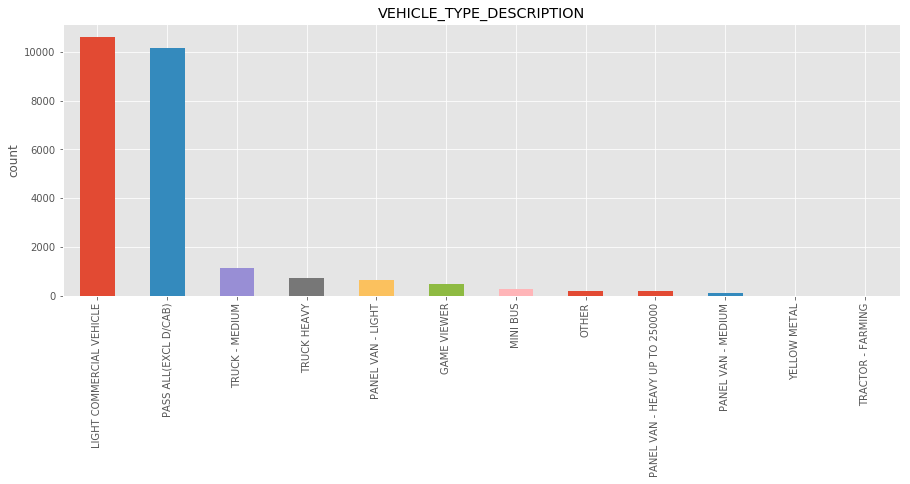

In [551]:
plt.figure(figsize=(15,5))
data.VEHICLE_TYPE_DESCRIPTION.value_counts().plot(kind = 'bar')
plt.title('VEHICLE_TYPE_DESCRIPTION')
plt.ylabel('count')
plt.show()

In [552]:
## bin following categor as other 
##GAME VIEWER, MINI BUS, OTHER, PANEL VAN - HEAVY UP TO 250000, PANEL VAN - LIGHT, PANEL VAN - MEDIUM,
##TRACTOR - FARMING,TRUCK HEAVY, YELLOW METAL
vehicle_type_list = ['GAME VIEWER','MINI BUS','OTHER','PANEL VAN - HEAVY UP TO 250000','PANEL VAN - LIGHT',
'PANEL VAN - MEDIUM','TRACTOR - FARMING','TRUCK - MEDIUM','TRUCK HEAVY','YELLOW METAL']

for i in range(len(data_final)):
    if (data_final.loc[i,'VEHICLE_TYPE_DESCRIPTION'] in vehicle_type_list):
        data_final.loc[0,'VEHICLE_TYPE_DESCRIPTION'] = 'Other'

In [553]:
data_final.to_csv('C:/Users/PL186042/Documents/Driver_action_assets/Emotion-Recognition-using-Python-master/Final_code/clean_data_telematic.csv', index = False)

In [554]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter

In [555]:
from scipy.stats import zscore
numeric_cols = data_final.select_dtypes(include=[np.number]).columns
data2 = data_final[numeric_cols].apply(zscore)

In [556]:
data2.dtypes

MAX_SPEED                     float64
NO_OF_HARSH_BRAKES            float64
NO_OF_HARSH_ACCELERATION      float64
NO_OF_SPEED_VIOLATIONS        float64
NO_EXCESS_IDLE                float64
NO_OF_TRIPS                   float64
TM_SCORE                      float64
ENGINE_CAPACITY               float64
FUEL_CONSUMPTION              float64
NUMBER_OF_GEARS               float64
TM_DRIVERID                   float64
RENTAL                        float64
KM_DRIVEN                     float64
PROJECTED_EXCESS_KM_CHARGE    float64
SPEED_PENALTY_POINTS          float64
SPEEDING_TIME_SECONDS         float64
DRIVING_TIME                  float64
total_time_driven             float64
Num_times_yawned              float64
Num_times_Angry               float64
Num_times_sleepy              float64
dtype: object

In [557]:
data_final.describe()

,MAX_SPEED,NO_OF_HARSH_BRAKES,NO_OF_HARSH_ACCELERATION,NO_OF_SPEED_VIOLATIONS,NO_EXCESS_IDLE,NO_OF_TRIPS,TM_SCORE,ENGINE_CAPACITY,FUEL_CONSUMPTION,NUMBER_OF_GEARS,...,RENTAL,KM_DRIVEN,PROJECTED_EXCESS_KM_CHARGE,SPEED_PENALTY_POINTS,SPEEDING_TIME_SECONDS,DRIVING_TIME,total_time_driven,Num_times_yawned,Num_times_Angry,Num_times_sleepy
count,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,...,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,2.453600e+04,24536.000000,24536.000000,24536.000000
mean,119.756847,13.872962,15.211078,149.802454,52.185075,158.630543,76.284501,2254.616482,8.289960,5.312765,...,3668.766090,2034.047788,2100.129063,297.393259,2301.430999,1757.067615,1.961368e+05,8.509823,10.743190,10.231633
std,34.194198,37.581739,43.651018,540.867398,218.338410,183.228728,20.639412,1503.807917,4.390734,1.042677,...,14042.178242,3619.579112,8954.198282,1320.617040,8190.338116,1037.874618,3.729941e+05,7.269105,7.582756,7.525949
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.800638,0.000000,0.000000,0.000000,...,-755699.920000,0.100000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000
25%,103.000000,0.000000,0.000000,0.000000,0.000000,25.000000,58.713822,1497.000000,6.600000,5.000000,...,220.000000,284.900000,0.000000,0.000000,0.000000,852.000000,3.432700e+04,5.000000,7.000000,7.000000
50%,128.000000,4.000000,2.000000,0.000000,0.000000,119.000000,83.420225,1987.000000,8.100000,5.000000,...,4400.950000,1442.650000,0.000000,0.000000,10.000000,1756.000000,1.553420e+05,8.000000,10.000000,10.000000
75%,141.000000,13.000000,13.000000,47.000000,15.000000,231.000000,94.064630,2494.000000,8.700000,6.000000,...,7595.030000,3079.200000,0.000000,68.000000,772.000000,2648.000000,2.884480e+05,11.000000,13.000000,13.000000
max,250.000000,1303.000000,1394.000000,15990.000000,7088.000000,4359.000000,100.117198,15928.000000,52.000000,8.000000,...,188924.980000,389264.000000,292810.520000,48673.000000,240782.000000,3596.000000,3.946534e+07,100.000000,100.000000,100.000000


In [558]:
from sklearn.cluster import KMeans

In [559]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [560]:
syms1 = np.array(data2['TM_DRIVERID'])

In [561]:
X1 = np.array(data2.iloc[:,1:])

In [562]:
clusters1 = kproto1.fit_predict(X1, categorical=[0,1,2,3,4])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5480, ncost: 298290.00412360346
Run: 1, iteration: 2/100, moves: 1335, ncost: 293247.64067706245
Run: 1, iteration: 3/100, moves: 696, ncost: 291442.3044976299
Run: 1, iteration: 4/100, moves: 375, ncost: 290603.8946033985
Run: 1, iteration: 5/100, moves: 245, ncost: 290085.34160737775
Run: 1, iteration: 6/100, moves: 118, ncost: 289907.6446094137
Run: 1, iteration: 7/100, moves: 55, ncost: 289859.9591669689
Run: 1, iteration: 8/100, moves: 29, ncost: 289841.51735513966
Run: 1, iteration: 9/100, moves: 24, ncost: 289827.98841253103
Run: 1, iteration: 10/100, moves: 19, ncost: 289821.79763526487
Run: 1, iteration: 11/100, moves: 11, ncost: 289817.40134841343
Run: 1, iteration: 12/100, moves: 15, ncost: 289810.2995493333
Run: 1, iteration: 13/100, moves: 19, ncost: 289769.9580244209
Run: 1, iteration: 14/100, moves: 15, ncost: 289700.48753924546
Run: 1, iteration: 15/100, move

In [563]:
df = pd.DataFrame(clusters1)
df.columns = ['cluster']
df.groupby(['cluster']).size()

cluster
0     3314
1    18452
2     1913
3      533
4      324
dtype: int64

In [564]:
data_final['cluster'] = df['cluster']

In [565]:
data_final.agg({'MAX_SPEED' : ['min', 'mean','max'], 'NO_OF_HARSH_BRAKES' : ['min', 'mean','max']} ,by='cluster')

,MAX_SPEED,NO_OF_HARSH_BRAKES
min,0.000000,0.000000
mean,119.756847,13.872962
max,250.000000,1303.000000


In [566]:
inf = data_final.groupby('cluster').agg(['min','mean', 'max'])

In [567]:
data_final.groupby('cluster').MAX_SPEED.agg(['min','mean', 'max'])

,min,mean,max
cluster,,,
0,0,130.552806,230
1,0,120.242738,249
2,0,85.124412,247
3,95,155.238274,238
4,0,127.771605,250


In [568]:
data_final.groupby('cluster').NO_OF_HARSH_BRAKES.agg(['min','mean', 'max'])

,min,mean,max
cluster,,,
0,0,14.626132,1162
1,0,14.288803,1303
2,0,2.124412,350
3,0,35.953096,413
4,0,15.530864,216


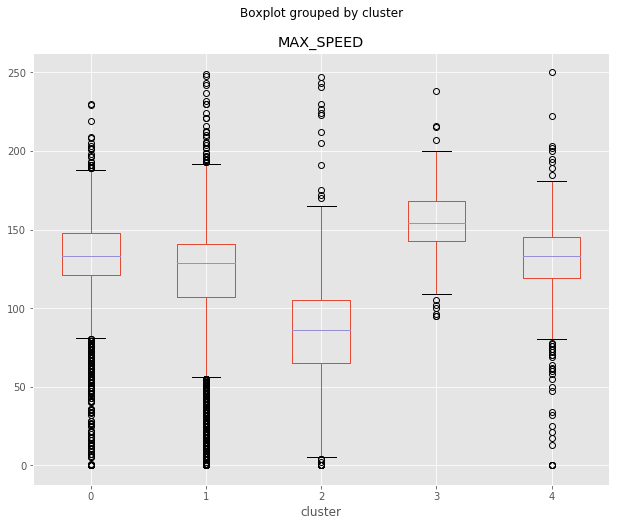

In [569]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('MAX_SPEED By Cluster')
data_final.boxplot(column=['MAX_SPEED'],by='cluster',ax=ax)

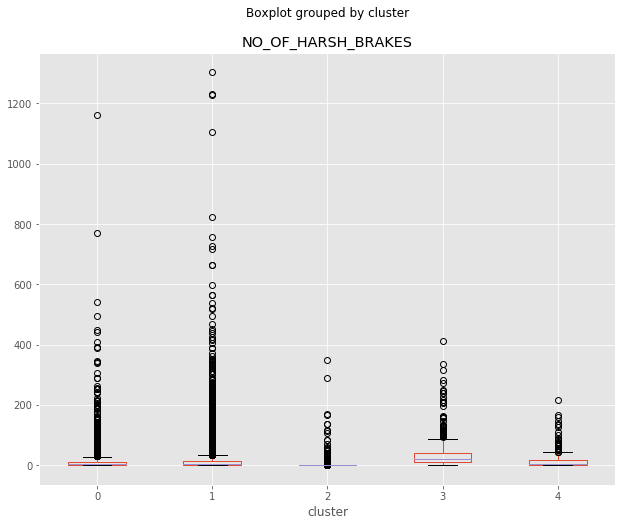

In [570]:
fig, ax = plt.subplots(figsize=(10,8))
data_final.boxplot(column=['NO_OF_HARSH_BRAKES'],by='cluster',ax=ax)

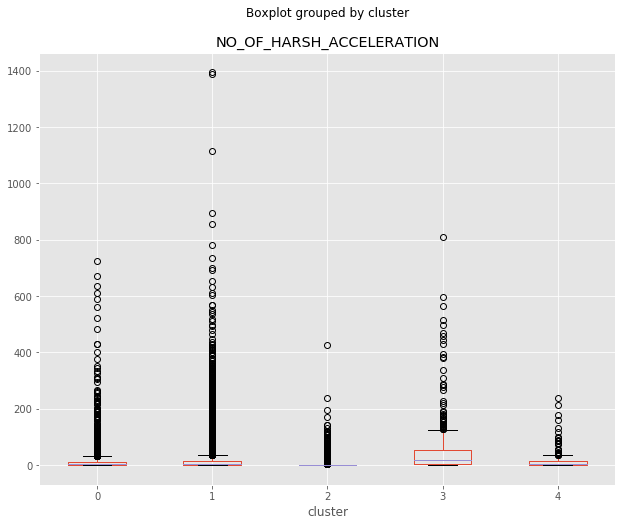

In [571]:
fig, ax = plt.subplots(figsize=(10,8))
data_final.boxplot(column=['NO_OF_HARSH_ACCELERATION'],by='cluster',ax=ax)

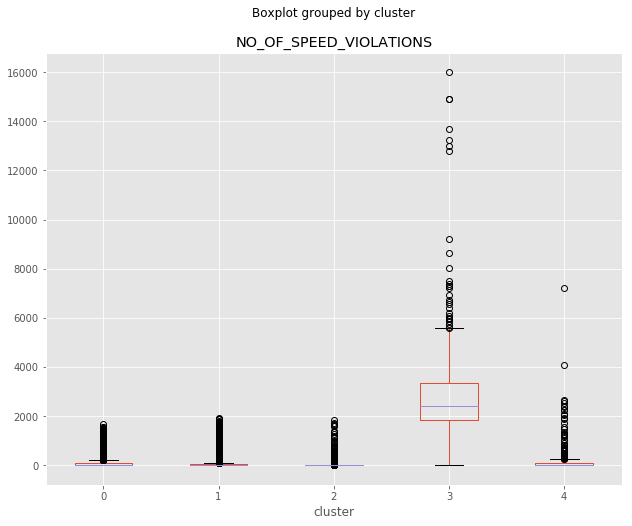

In [572]:
fig, ax = plt.subplots(figsize=(10,8))
data_final.boxplot(column=['NO_OF_SPEED_VIOLATIONS'],by='cluster',ax=ax)

In [573]:
inf = data_final.groupby('cluster').agg(['min','mean', 'max'])
inf.to_csv('jminfo2.csv', sep=',')

In [574]:
data_final.to_csv('C:/Users/PL186042/Documents/Driver_action_assets/Emotion-Recognition-using-Python-master/Final_code/data_with_cluster.csv',sep=',')

In [746]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [747]:
file = 'C:/Users/PL186042/Documents/Driver_action_assets/Emotion-Recognition-using-Python-master/Final_code/data_with_cluster.csv'
data_neww = pd.read_csv(file)

In [748]:
data_neww.shape

(24536, 28)

In [749]:
data_neww.head()

,Unnamed: 0,MAX_SPEED,NO_OF_HARSH_BRAKES,NO_OF_HARSH_ACCELERATION,NO_OF_SPEED_VIOLATIONS,NO_EXCESS_IDLE,NO_OF_TRIPS,TM_SCORE,COMPANY_CODE,ENGINE_CAPACITY,...,KM_DRIVEN,PROJECTED_EXCESS_KM_CHARGE,SPEED_PENALTY_POINTS,SPEEDING_TIME_SECONDS,DRIVING_TIME,total_time_driven,Num_times_yawned,Num_times_Angry,Num_times_sleepy,cluster
0,0,150,20,30,155,0,94,38.26494,KFS,1598,...,971.464,0.0,359,2416,528,720528,5.0,10.0,9.0,0
1,1,124,5,5,0,0,13,90.00000,KFS,1598,...,68.967,0.0,0,0,2760,9960,9.0,11.0,10.0,0
2,2,162,4,9,162,0,155,55.65427,KFS,2999,...,1124.653,0.0,376,2506,2500,204100,12.0,15.0,11.0,0
3,3,161,26,19,119,0,244,46.48293,KFS,2999,...,1416.056,0.0,284,1863,432,184032,7.0,10.0,9.0,0
4,4,171,25,35,642,0,139,52.07689,KFS,2999,...,3329.294,0.0,1638,9844,724,220324,6.0,6.0,8.0,0


In [750]:
data_neww = data_neww.drop(['PRODUCT_CODE' , 'TM_REGISTRATION_NUMBER','TM_DRIVERID'],axis =1)

In [751]:
column_names_for_onehot = data_neww.select_dtypes(include=[object]).columns

In [752]:
column_names_for_onehot = ['COMPANY_CODE', 'VEHICLE_TYPE_DESCRIPTION', 'FUEL_TYPE']

In [753]:
dataa1 = pd.get_dummies(data_neww, columns=column_names_for_onehot, drop_first=True)

In [754]:
dataa1.shape

(24536, 42)

In [757]:
#X = dataa1.loc[:, df.columns != 'target']
X = dataa1[dataa1.columns.difference(['target'])]
#Y = dataa1.loc[:, df.columns = 'target']

In [758]:
Y = dataa1['target']

In [766]:
dataa1.dtypes

Unnamed: 0                                                   int64
MAX_SPEED                                                    int64
NO_OF_HARSH_BRAKES                                           int64
NO_OF_HARSH_ACCELERATION                                     int64
NO_OF_SPEED_VIOLATIONS                                       int64
NO_EXCESS_IDLE                                               int64
NO_OF_TRIPS                                                  int64
TM_SCORE                                                   float64
ENGINE_CAPACITY                                              int64
FUEL_CONSUMPTION                                           float64
NUMBER_OF_GEARS                                            float64
RENTAL                                                     float64
KM_DRIVEN                                                  float64
PROJECTED_EXCESS_KM_CHARGE                                 float64
SPEED_PENALTY_POINTS                                         i

In [767]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,stratify=Y)

In [768]:
X_train.columns

Index(['COMPANY_CODE_LES', 'COMPANY_CODE_NAM', 'COMPANY_CODE_RSA',
       'COMPANY_CODE_TAN', 'COMPANY_CODE_VUS', 'COMPANY_CODE_ZAM',
       'DRIVING_TIME', 'ENGINE_CAPACITY', 'FUEL_CONSUMPTION',
       'FUEL_TYPE_HYBRID', 'FUEL_TYPE_PETROL', 'KM_DRIVEN', 'MAX_SPEED',
       'NO_EXCESS_IDLE', 'NO_OF_HARSH_ACCELERATION', 'NO_OF_HARSH_BRAKES',
       'NO_OF_SPEED_VIOLATIONS', 'NO_OF_TRIPS', 'NUMBER_OF_GEARS',
       'Num_times_Angry', 'Num_times_sleepy', 'Num_times_yawned',
       'PROJECTED_EXCESS_KM_CHARGE', 'RENTAL', 'SPEEDING_TIME_SECONDS',
       'SPEED_PENALTY_POINTS', 'TM_SCORE', 'Unnamed: 0',
       'VEHICLE_TYPE_DESCRIPTION_LIGHT COMMERCIAL VEHICLE',
       'VEHICLE_TYPE_DESCRIPTION_MINI BUS', 'VEHICLE_TYPE_DESCRIPTION_OTHER',
       'VEHICLE_TYPE_DESCRIPTION_Other',
       'VEHICLE_TYPE_DESCRIPTION_PANEL VAN - HEAVY UP TO 250000',
       'VEHICLE_TYPE_DESCRIPTION_PANEL VAN - LIGHT',
       'VEHICLE_TYPE_DESCRIPTION_PANEL VAN - MEDIUM',
       'VEHICLE_TYPE_DESCRIPTION_PASS ALL(

In [769]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(17175, 41) (7361, 41) (17175,) (7361,)


In [770]:
d0 = dataa1.groupby('target').agg(['count'])

In [771]:
d0.iloc[:,1]

target
0     3314
1    18452
2     1913
3      533
4      324
Name: (MAX_SPEED, count), dtype: int64

In [772]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [773]:
#X_train.iloc[2:,3:4]  #X_train.iloc[:,3:-1]

In [775]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=6)
    cv_result = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

C:\Users\PL186042\AppData\Local\Continuum\anaconda3.1\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\PL186042\AppData\Local\Continuum\anaconda3.1\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\PL186042\AppData\Local\Continuum\anaconda3.1\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LR 0.8404074524001944
LDA 0.8494904221096345
KNN 0.7921399350525461
CART 0.8428525418768533
NB 0.7711206149220328
SVM 0.7520234753323588
